In [202]:
import imp
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import h5py

import util
from plot_core import PlotAx, STYLE_PATH
from util import *
from data_loader import *
from plot_model_training import *

import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['agg.path.chunksize'] = 10000
pylab.rcParams['figure.figsize'] = (6.4, 4.8)
pylab.rcParams['figure.dpi'] = 100

In [23]:
in_file = 'Data/result.hdf'
with h5py.File(in_file, 'r') as hdf:
    data1 = hdf.get('X')[:]
    data2 = hdf.get('Y')[:]
bias = data2 - data1

In [24]:
bias_mean = bias.mean(axis=0)

In [25]:
bias_mean.shape

(3369,)

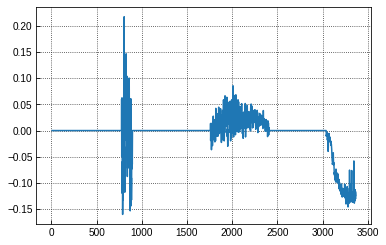

In [26]:
plt.plot(bias[0])

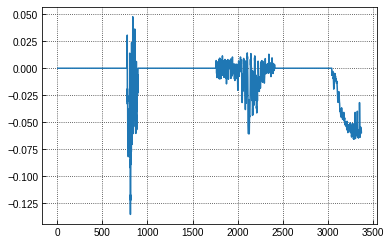

In [27]:
plt.plot(bias_mean)

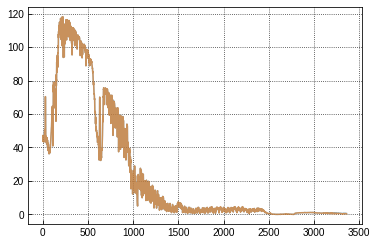

In [28]:
for data in [data1, data2]:
    plt.plot(data[0], alpha=0.6)

In [29]:
wave_number = np.arange(650., 2755.0 + 0.625, 0.625)

In [30]:
data_x_tbb = rad2tbb(data1, wave_number)

In [31]:
data_y_tbb = rad2tbb(data2, wave_number)

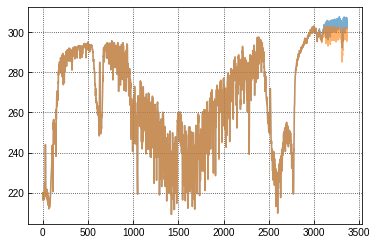

In [32]:
for data in [data_x_tbb, data_y_tbb]:
    plt.plot(data[0], alpha=0.6)

In [33]:
bias_tbb = data_y_tbb - data_x_tbb

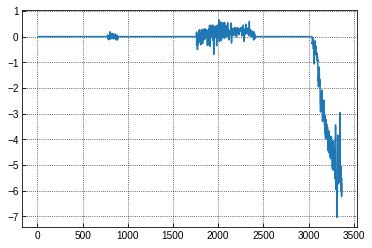

In [34]:
plt.plot(bias_tbb[0])

In [71]:
dir_root = '/home/cali'
dir_data = os.path.join(dir_root, 'data/GapFilling')
dir_iasi = os.path.join(dir_data, 'IASI')

In [72]:
in_files = os.listdir(dir_iasi)

In [73]:
in_files

['IASI_xxx_1C_M01_20160110032955Z_20160110033258Z_N_O_20160110040418Z__20160110040552',
 'IASI_xxx_1C_M01_20160406182958Z_20160406183254Z_N_O_20160406190701Z__20160406190930',
 'IASI_xxx_1C_M01_20161030144456Z_20161030144759Z_N_O_20161030151645Z__20161030151830',
 'IASI_xxx_1C_M01_20161101124759Z_20161101125055Z_N_O_20161101133622Z__20161101133737',
 'IASI_xxx_1C_M01_20160406020854Z_20160406021158Z_N_O_20160406025542Z__20160406030144',
 'IASI_xxx_1C_M01_20160626204154Z_20160626204458Z_N_O_20160626212907Z__20160626213049',
 'IASI_xxx_1C_M01_20160406174454Z_20160406174758Z_N_O_20160406181723Z__20160406182920',
 'IASI_xxx_1C_M01_20160626222658Z_20160626222954Z_N_O_20160626231240Z__20160626231350',
 'IASI_xxx_1C_M01_20161101074759Z_20161101075055Z_N_O_20161101083553Z__20161101083658',
 'IASI_xxx_1C_M01_20160626013554Z_20160626013858Z_N_O_20160626023047Z__20160626023221',
 'IASI_xxx_1C_M01_20160406074158Z_20160406074454Z_N_O_20160406081311Z__20160406082030',
 'IASI_xxx_1C_M01_20160626132954

In [74]:
in_files = [os.path.join(dir_iasi, i) for i in in_files]

In [75]:
in_files

['/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160110032955Z_20160110033258Z_N_O_20160110040418Z__20160110040552',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406182958Z_20160406183254Z_N_O_20160406190701Z__20160406190930',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20161030144456Z_20161030144759Z_N_O_20161030151645Z__20161030151830',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20161101124759Z_20161101125055Z_N_O_20161101133622Z__20161101133737',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406020854Z_20160406021158Z_N_O_20160406025542Z__20160406030144',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160626204154Z_20160626204458Z_N_O_20160626212907Z__20160626213049',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406174454Z_20160406174758Z_N_O_20160406181723Z__20160406182920',
 '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160626222658Z_20160626222954Z_N_O_20160626231240Z__20160626231350',
 '/home/cali/data/GapFilling/IASI/IASI_x

In [76]:
for in_file in in_files[:50]:
    loader_iasi = LoaderIasiL1(in_file)
    sun_zenith = loader_iasi.get_sun_zenith()
    if sun_zenith.min() > 120:
        print('Night: {}'.format(in_file))
    elif sun_zenith.max() < 70:
        print('Day: {}'.format(in_file))

Night: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160110032955Z_20160110033258Z_N_O_20160110040418Z__20160110040552
Night: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406182958Z_20160406183254Z_N_O_20160406190701Z__20160406190930
Day: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20161030144456Z_20161030144759Z_N_O_20161030151645Z__20161030151830
Day: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406020854Z_20160406021158Z_N_O_20160406025542Z__20160406030144
Day: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160406174454Z_20160406174758Z_N_O_20160406181723Z__20160406182920
Night: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160626132954Z_20160626133258Z_N_O_20160626142117Z__20160626142228
Day: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160626061458Z_20160626061754Z_N_O_20160626065235Z__20160626065402
Night: /home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20161030115656Z_20161030115959Z_N_O_20161030124120Z__20161030124243
Day: /home/cali/data/Gap

In [285]:
in_file_night = '/home/cali/data/GapFilling/IASI/IASI_xxx_1C_M01_20160626015954Z_20160626020258Z_N_O_20160626024033Z__20160626024148'
loader_iasi = LoaderIasiL1(in_file_night)
rad = loader_iasi.get_spectrum_radiance()[:, :8461]
print(rad.shape)
wn = loader_iasi.get_spectrum_wavenumber()[0, :8461]
print(wn.shape)
tbb = rad2tbb(rad, wn)

(2760, 8461)
(8461,)


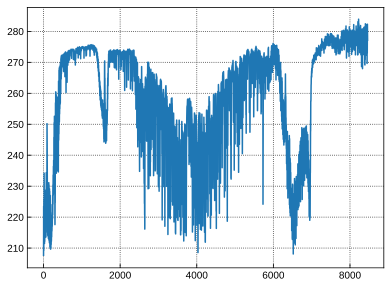

0


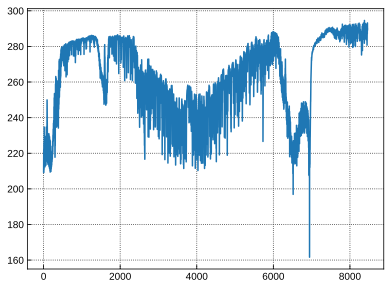

1


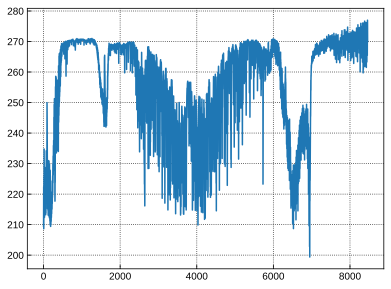

2


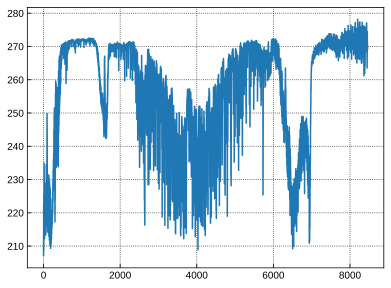

3


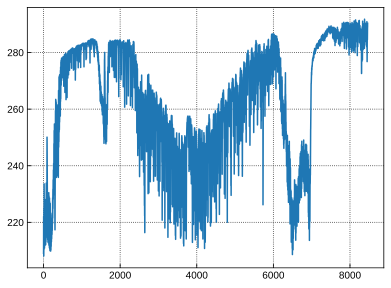

4


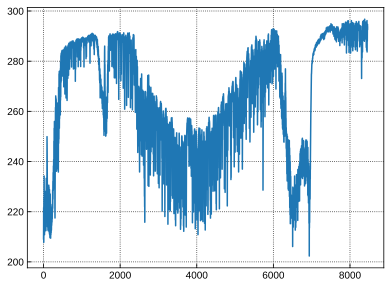

5


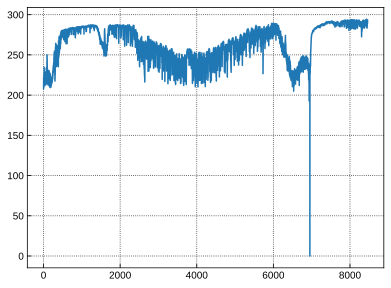

6


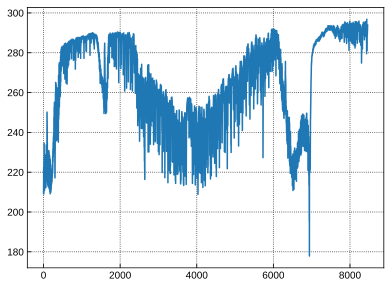

7


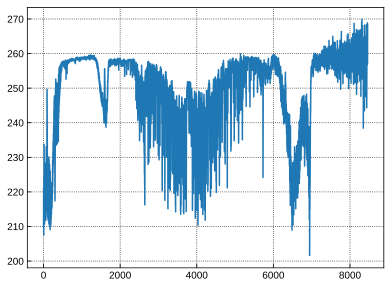

8


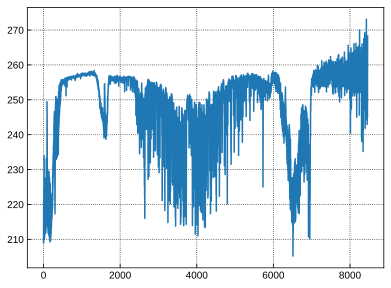

9


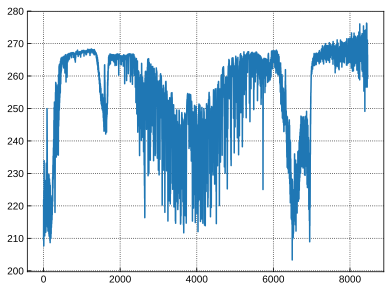

10


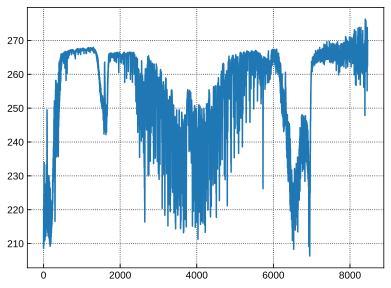

11


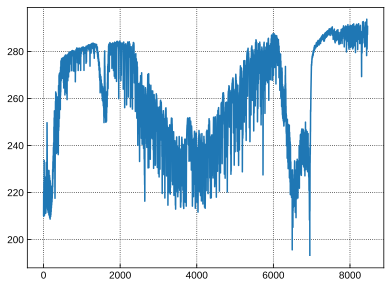

12


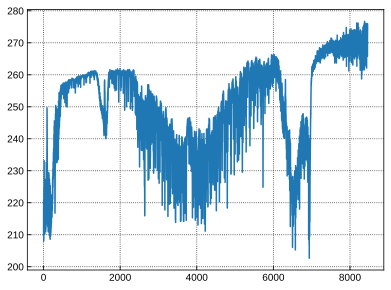

13


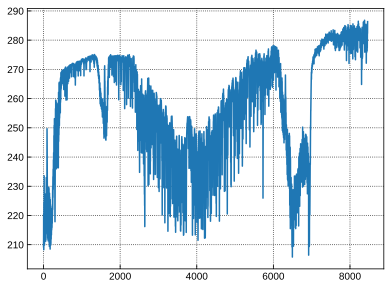

14


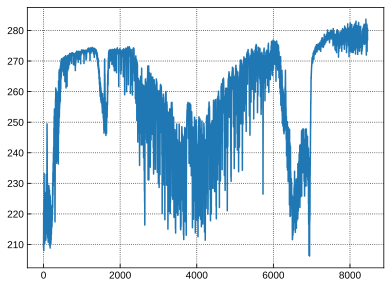

15


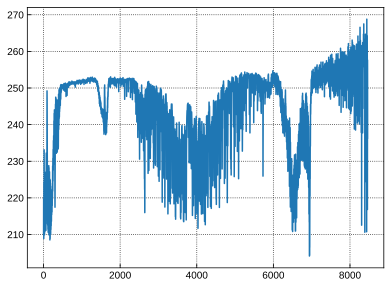

16


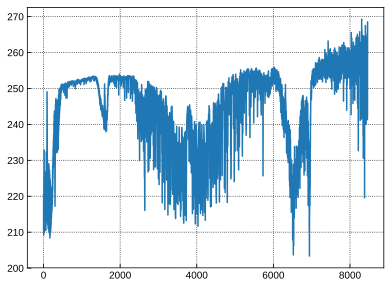

17


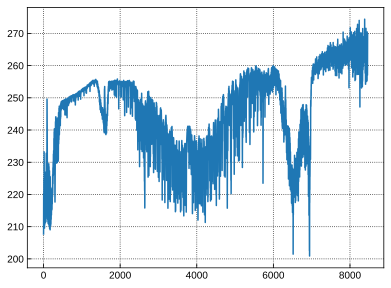

18


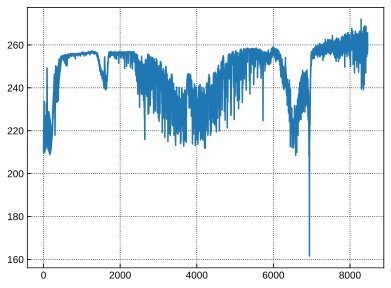

19


In [286]:
for i in range(20):
    plt.plot(tbb[i])
    plt.show()
    print(i)

In [287]:
IASI_F_NYQUIST = 6912.0  # 频带宽度  cm-1
IASI_RESAMPLE_MAXX = [2.0, ]  # cm OPD
IASI_D_FREQUENCY = [0.25, ]  # v cm-1  光谱分辨率
IASI_BAND_F1 = [645.25, ]  # 光谱带开始
IASI_BAND_F2 = [2760.25, ]  # 光谱带结束
IASI_FILTER_WIDTH = [20.0, ]  # cm-1  # COS过滤器过滤的宽度

GIIRS_F_NYQUIST = 5875.0
GIIRS_RESAMPLE_MAXX = [0.8, ]
GIIRS_D_FREQUENCY = [0.625, ]
GIIRS_BAND_F1 = [645.625, ]
GIIRS_BAND_F2 = [2760., ]
GIIRS_FILTER_WIDTH = [20.0, ]

In [288]:
from spectrum_conversion import iasi2hiras

In [311]:
radiance = rad[14]
iband=0
rad_hiras, wavenumber_hiras, plot_data_iasi2giirs = iasi2hiras(
        radiance, IASI_BAND_F1[iband], IASI_BAND_F2[iband], IASI_D_FREQUENCY[iband],
        GIIRS_BAND_F1[iband], GIIRS_BAND_F2[iband], GIIRS_D_FREQUENCY[iband],
        GIIRS_F_NYQUIST, GIIRS_RESAMPLE_MAXX[iband], GIIRS_FILTER_WIDTH[iband],
        apodization_ori=iasi_apod,)

23501
2580 11041
2500 2581 11040 11121
47000
47000
idx_trunc 9400
n_ifg_other 9401
18800
18800


In [312]:
hiras_tbb = rad2tbb(rad_hiras, wavenumber_hiras)
iasi_tbb = rad2tbb(radiance, wn)

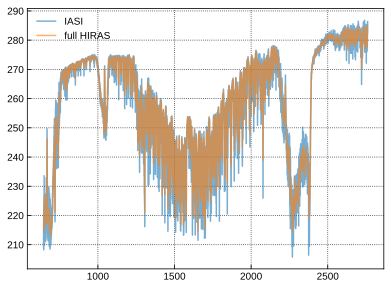

In [313]:
plt.plot(wn, iasi_tbb, alpha=0.6, label='IASI')
plt.plot(wavenumber_hiras, hiras_tbb, alpha=0.6, label='full HIRAS')
plt.legend()

In [314]:
ranges_X_all = [(650., 1135., 0.625), (1210., 1750., 0.625), (2155., 2550., 0.625),]
hiras_gap = get_data_by_wavenumber_range(pd.DataFrame(rad_hiras.reshape(1, -1)), wavenumber_hiras, ranges_X_all)

In [315]:
hiras_gap = np.array(hiras_gap)

In [316]:
ranges_Y_all = [(1135.625, 1209.375, 0.625), (1750.625, 2154.375, 0.625), (2550.625, 2755., 0.625), ]
wn_gap = get_wavenumber_by_range(ranges_Y_all)

In [317]:
in_file_model = os.path.join(dir_model, 'linear_model_attribute_test_hiras_xuhui.h5')
with h5py.File(in_file_model, 'r') as hdf:
    a = hdf.get('P0')[:]
    b = hdf.get('C0')[:]
    gap = np.dot(hiras_gap, a) + b
    ranges_Y_all = [(1135.625, 1209.375, 0.625), (1750.625, 2154.375, 0.625), (2550.625, 2755., 0.625), ]
    wn_gap = get_wavenumber_by_range(ranges_Y_all)
tbb_gap_old = rad2tbb(gap, wn_gap)

In [318]:
in_file_model = os.path.join(dir_model, 'linear_model_attribute_test_hiras.h5')
with h5py.File(in_file_model, 'r') as hdf:
    a = hdf.get('P0')[:]
    b = hdf.get('C0')[:]
    gap = np.dot(hiras_gap, a) + b
    ranges_Y_all = [(1135.625, 1209.375, 0.625), (1750.625, 2154.375, 0.625), (2550.625, 2755., 0.625), ]
    wn_gap = get_wavenumber_by_range(ranges_Y_all)
tbb_gap_new = rad2tbb(gap, wn_gap)

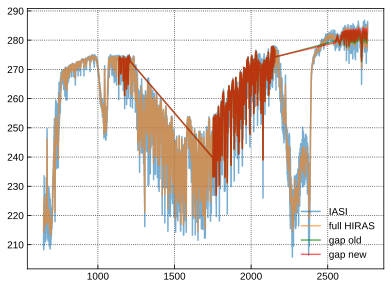

In [319]:
plt.plot(wn, iasi_tbb, alpha=0.6, label='IASI')
plt.plot(wavenumber_hiras, hiras_tbb, alpha=0.6, label='full HIRAS')
plt.plot(wn_gap, tbb_gap_old[0], alpha=0.6, label='gap old', c='green')
plt.plot(wn_gap, tbb_gap_new[0], alpha=0.6, label='gap new', c='red')
plt.legend()

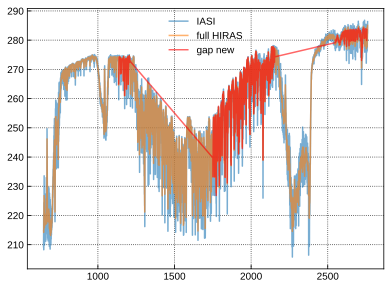

In [320]:
plt.plot(wn, iasi_tbb, alpha=0.6, label='IASI')
plt.plot(wavenumber_hiras, hiras_tbb, alpha=0.6, label='full HIRAS')
plt.plot(wn_gap, tbb_gap_new[0], alpha=0.6, label='gap new', c='red')
plt.legend()

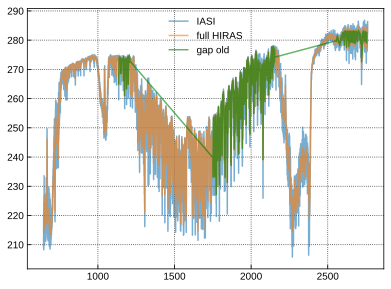

In [321]:
plt.plot(wn, iasi_tbb, alpha=0.6, label='IASI')
plt.plot(wavenumber_hiras, hiras_tbb, alpha=0.6, label='full HIRAS')
plt.plot(wn_gap, tbb_gap_old[0], alpha=0.6, label='gap old', c='green')
plt.legend()